In [40]:
import pandas as pd
from pandas import get_dummies
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import nbformat
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

In [47]:
#working in local machine
Data_PATH = r"..\data\processed\preprocessed_1.csv.pkl"
#working in codespace
# Data_PATH = r"/workspaces/stackoverflowDeveloper/data/processed/preprocessed_1.csv.pkl"

EXPORT_PATH = r"..\data\processed\onehot_2.pkl"

TECH_COL = ["MiscTechWorkedWith", "NEWCollabToolsWorkedWith", "DatabaseWorkedWith", "WebframeWorkedWith", "LanguageWorkedWith", "PlatformWorkedWith"]
JOB_COL = "DevType"
COL_READ = TECH_COL +[JOB_COL]

In [7]:
df = pd.read_pickle(Data_PATH)
df = df.filter(COL_READ)
df.head()

,MiscTechWorkedWith,NEWCollabToolsWorkedWith,DatabaseWorkedWith,WebframeWorkedWith,LanguageWorkedWith,PlatformWorkedWith,DevType
0,"[.NET, .NET Core]","[Confluence, Jira, Slack, Microsoft Azure, Tre...","[Elasticsearch, Microsoft SQL Server, Oracle]","[ASP.NET, ASP.NET Core]","[C#, HTML/CSS, JavaScript]",[Windows],"[Developer, desktop or enterprise applications..."
1,[React Native],"[Confluence, Jira, Github, Gitlab, Slack]",[],[],"[JavaScript, Swift]",[iOS],"[Developer, full-stack, Developer, mobile]"
2,[],[],[],[],"[Objective-C, Python, Swift]",[],[]
3,[],[],[],[],[],[],[]
4,[Ansible],"[Confluence, Jira, Github, Slack, Google Suite...","[MySQL, PostgreSQL, Redis, SQLite]",[Ruby on Rails],"[HTML/CSS, Ruby, SQL]","[AWS, Docker, Linux, MacOS, Windows]",[]


In [8]:
def frequency_visualize(data):
    flattend_list = []
    colun_names = list(data.columns)
    for col_num in range(0,data.shape[1]):
        temp = [item for sublist in data[colun_names[col_num]] for item in sublist]
        flattend_list.append(temp)
    
    flattend_all_list = [item for sublist in flattend_list for item in sublist]
    freq_languages = Counter(flattend_all_list)

    language = list(freq_languages.keys())
    frequancy = list(freq_languages.values())
    plt.figure(figsize=(10, 20))
    plt.barh(language, frequancy)



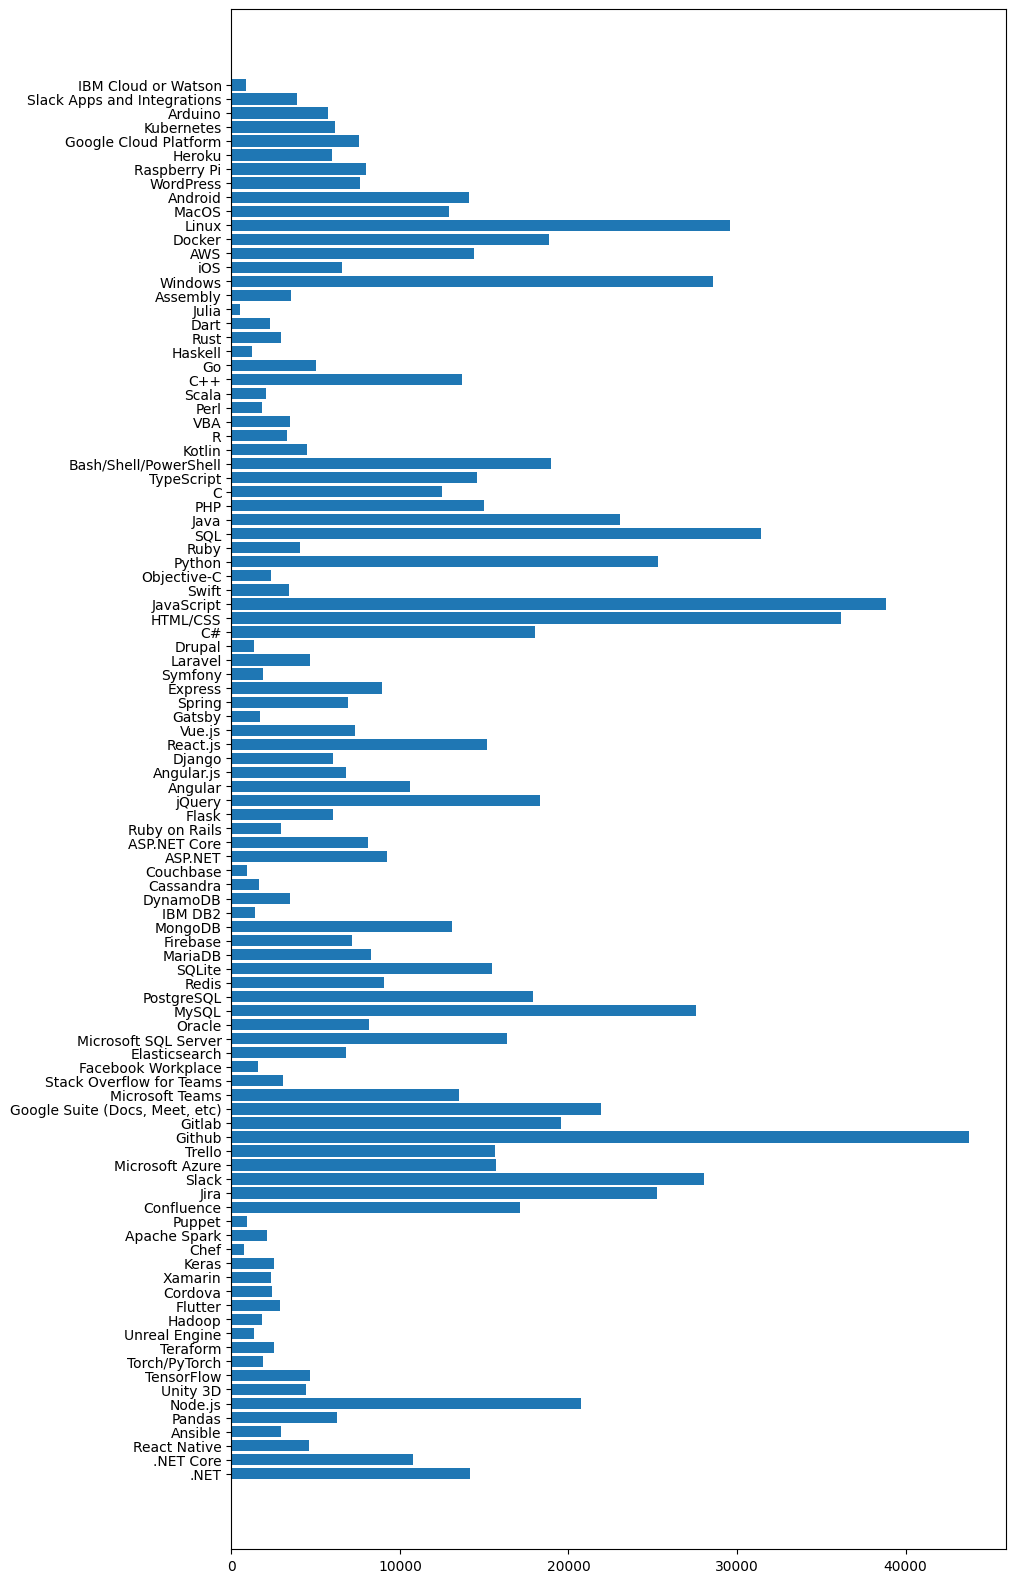

In [9]:
df_skills = df[TECH_COL]
frequency_visualize(df_skills)

In [53]:
def get_jobs_name(dataFrame):
    flattend_list = [item for sublist in dataFrame["DevType"] for item in sublist]
    frequancy_jobs = Counter(flattend_list)
    jobs = list(frequancy_jobs.keys())
    return jobs

jobs = get_jobs_name(df)
jobs[:10]

['Developer, desktop or enterprise applications',
 'Developer, full-stack',
 'Developer, mobile',
 'Designer',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, QA or test',
 'DevOps specialist',
 'Developer, game or graphics',
 'Database administrator']

In [33]:
sorted_jobs_frequancy = dict(sorted(frequancy_jobs.items(), key=lambda item: item[1]))
sorted_jobs_frequancy

{'Marketing or sales professional': 642,
 'Senior executive/VP': 1320,
 'Engineer, site reliability': 1940,
 'Scientist': 2086,
 'Product manager': 2497,
 'Engineering manager': 2724,
 'Developer, game or graphics': 2789,
 'Educator': 2928,
 'Academic researcher': 3552,
 'Engineer, data': 3738,
 'Developer, QA or test': 3947,
 'Data scientist or machine learning specialist': 3988,
 'Data or business analyst': 4024,
 'Developer, embedded applications or devices': 4750,
 'System administrator': 5242,
 'Designer': 5321,
 'Database administrator': 5722,
 'DevOps specialist': 5969,
 'Developer, mobile': 9482,
 'Developer, desktop or enterprise applications': 11784,
 'Developer, front-end': 18296,
 'Developer, full-stack': 27125,
 'Developer, back-end': 27228}

<AxesSubplot: >

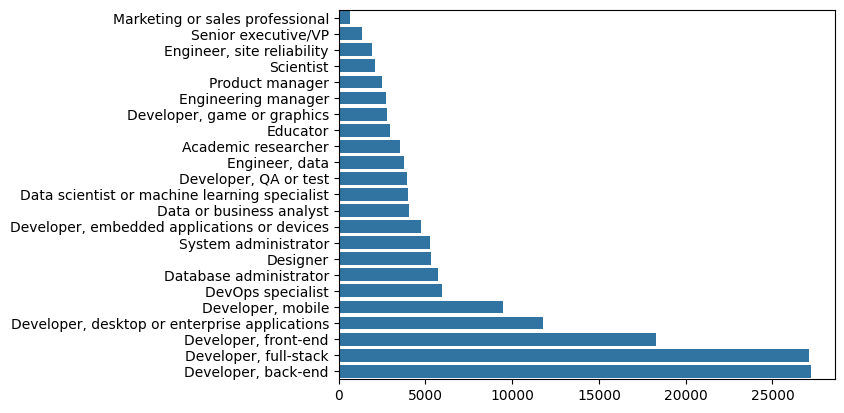

In [34]:
sns.barplot(x=sorted_jobs_frequancy.values(), y=sorted_jobs_frequancy.keys(), orient='h')

# Convert to onehot encoding to vigualize them and get the relationship of them

In [12]:
df2 = df.copy()
dfs_encoded ={}
for col in COL_READ:
    mlb = MultiLabelBinarizer()
    df_encodded = pd.DataFrame(mlb.fit_transform(df[col]), columns = mlb.classes_, index=df[col].index)
    dfs_encoded[col] = df_encodded

df2 = pd.concat(dfs_encoded, axis=1)
df2.head()

MiscTechWorkedWith                                                      \
                .NET .NET Core Ansible Apache Spark Chef Cordova Flutter   
0                  1         1       0            0    0       0       0   
1                  0         0       0            0    0       0       0   
2                  0         0       0            0    0       0       0   
3                  0         0       0            0    0       0       0   
4                  0         0       1            0    0       0       0   

                        ...           DevType                          \
  Hadoop Keras Node.js  ... Developer, mobile Educator Engineer, data   
0      0     0       0  ...                 0        0              0   
1      0     0       0  ...                 1        0              0   
2      0     0       0  ...                 0        0              0   
3      0     0       0  ...                 0        0              0   
4      0     0       0  ...                 0        0              0   

                                                  \
  Engineer, site reliability Engineering manager   
0                          0                   0   
1                          0                   0   
2                          0                   0   
3                          0                   0   
4                          0                   0   

                                                             \
  Marketing or sales professional Product manager Scientist   
0                               0               0         0   
1                               0               0         0   
2                               0               0         0   
3                               0               0         0   
4                               0               0         0   

                                            
  Senior executive/VP System administrator  
0                   0                    0  
1                   0                    0  
2                   0                    0  
3                   0                    0  
4                   0                    0  

[5 rows x 124 columns]

In [13]:
df2.shape

(64461, 124)

In [48]:
df2.to_pickle(EXPORT_PATH)

# Treemap to visualize the frequency of each skill

In [14]:
df_skills_onehot = df2.copy()
df_skills_onehot = df_skills_onehot.drop("DevType", axis=1)
df_skills_frequency = df_skills_onehot.sum().reset_index()
df_skills_frequency.head()

,level_0,level_1,0
0,MiscTechWorkedWith,.NET,14144
1,MiscTechWorkedWith,.NET Core,10755
2,MiscTechWorkedWith,Ansible,2955
3,MiscTechWorkedWith,Apache Spark,2089
4,MiscTechWorkedWith,Chef,733


In [15]:
df_skills_frequency.columns = ["skill_group", "skill", "frequency"]
df_skills_frequency.head()

,skill_group,skill,frequency
0,MiscTechWorkedWith,.NET,14144
1,MiscTechWorkedWith,.NET Core,10755
2,MiscTechWorkedWith,Ansible,2955
3,MiscTechWorkedWith,Apache Spark,2089
4,MiscTechWorkedWith,Chef,733


In [25]:
#sort according to frequancy
df_skills_frequency.sort_values(by="frequency", ascending=False)

fig = px.treemap(df_skills_frequency, values="frequency", path=["skill_group","skill"], color="frequency", color_continuous_scale='Viridis')
fig.update_layout(width=1400, height=700)
fig.show()

# Heatmap to visualize the precentage of each skill in each job

In [17]:
#Make the percentage matrix
skills_percentage_matrix = []
for job in jobs:
    job_mask = df2[("DevType", job)]==1
    job_skills_percentage = []
    for tech_col in TECH_COL:
        job_skills_percentage = job_skills_percentage + list(df2.loc[job_mask][tech_col].mean()*100)
    skills_percentage_matrix.append(job_skills_percentage)

In [52]:
def get_skills_names(dataFrame):
    #Make a skills list 
    skills = []
    job_mask = dataFrame[("DevType", "Educator")]==1  #Educator or any job as all jobs has the same columns
    for tech_col in TECH_COL:
        skills = skills + list(dataFrame.loc[job_mask][tech_col].columns)

    return skills

skills = get_skills_names(df2)[:10]

['.NET',
 '.NET Core',
 'Ansible',
 'Apache Spark',
 'Chef',
 'Cordova',
 'Flutter',
 'Hadoop',
 'Keras',
 'Node.js']

In [19]:
fig = go.Figure(data=go.Heatmap(
        z=skills_percentage_matrix,
        x=skills,
        y=jobs,
        colorscale='Viridis'))
fig.update_layout( width=2000,
                  height=800,
                  title="skills frequancy unsorted")
fig.show()

## heatmap in another way by making a dataFrame

In [38]:
df_skills_percentage = pd.DataFrame(skills_percentage_matrix, columns=skills, index=jobs)
df_skills_percentage_sorted = df_skills_percentage.loc[:, df_skills_percentage.sum(axis=0).sort_values().index]


fig = px.imshow(df_skills_percentage_sorted, color_continuous_scale='viridis')
fig.update_layout( width=2000,
                  height=800,
                  title="skills frequancy sorted")
fig.show()

In [39]:
df_skills_percentage_sorted.head()

,Julia,Chef,Haskell,IBM Cloud or Watson,Couchbase,Puppet,IBM DB2,Unreal Engine,Gatsby,Facebook Workplace,...,Jira,Python,Slack,MySQL,Windows,Linux,SQL,HTML/CSS,JavaScript,Github
"Developer, desktop or enterprise applications",0.721317,1.298371,1.849966,1.451120,2.197895,1.756619,3.920570,2.774949,1.858452,2.528853,...,45.239308,36.108282,41.352682,43.737271,68.779701,49.456891,62.024779,61.311948,65.699253,69.730143
"Developer, full-stack",0.512442,1.441475,1.692166,1.448848,1.994470,1.725346,2.647005,1.824885,4.173272,2.573272,...,48.247005,36.202765,52.733641,50.226728,48.862673,51.181567,62.046083,73.784332,81.990783,75.395392
"Developer, mobile",0.548408,1.065176,1.497574,1.813963,2.309639,1.497574,2.204176,3.290445,3.374815,3.680658,...,45.074879,31.195950,52.710399,50.348028,41.700063,40.392322,50.284750,60.693946,66.642059,77.747311
Designer,0.920880,1.541064,1.935726,2.123661,2.236422,2.161248,3.457997,4.021800,4.698365,3.476790,...,34.636347,35.951889,42.022176,55.196392,55.440707,44.747228,58.804736,74.873144,75.981958,72.486375
"Developer, front-end",0.448185,1.043944,1.617840,1.426541,1.841933,1.579580,2.361172,2.104285,5.329034,3.027984,...,45.917140,31.296458,51.470267,50.841714,48.885002,45.419764,56.394840,78.312199,84.012899,75.726935


In [69]:
scaler = StandardScaler()
skills_percentage_matrix_scaled = scaler.fit_transform(skills_percentage_matrix)
df_skills_percentage_normalized = pd.DataFrame(skills_percentage_matrix_scaled, columns=skills, index=jobs)
df_skills_percentage_sorted_scaled = df_skills_percentage_normalized.loc[:, df_skills_percentage_normalized.sum(axis=0).sort_values().index]

fig = px.imshow(df_skills_percentage_sorted_scaled, color_continuous_scale='viridis')
fig.update_layout( width=2000,
                  height=800,
                  title="skills frequancy normalized",)
fig.show()

# Concatenate the percentage and the normalized frequancy to show the specificity

In [54]:
jobs

['Developer, desktop or enterprise applications',
 'Developer, full-stack',
 'Developer, mobile',
 'Designer',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, QA or test',
 'DevOps specialist',
 'Developer, game or graphics',
 'Database administrator',
 'Developer, embedded applications or devices',
 'Engineer, data',
 'Educator',
 'System administrator',
 'Engineering manager',
 'Product manager',
 'Data or business analyst',
 'Academic researcher',
 'Data scientist or machine learning specialist',
 'Scientist',
 'Senior executive/VP',
 'Engineer, site reliability',
 'Marketing or sales professional']

In [157]:
job = 'Developer, back-end' #what will be visualized
df_skills_concat_percentage_normalized = pd.concat([df_skills_percentage.loc[job], df_skills_percentage_normalized.loc[job]], axis=1)
df_skills_concat_percentage_normalized.columns=["percentage", "specificity"]
df_skills_concat_percentage_normalized = df_skills_concat_percentage_normalized.sort_values("percentage")
df_skills_concat_percentage_normalized.head()

,percentage,specificity
Julia,0.561922,-0.962484
IBM Cloud or Watson,1.432349,-1.064855
Chef,1.604965,-0.661765
Unreal Engine,1.777582,-0.674764
Puppet,1.986925,-0.680071


In [158]:
df_skills_concat_percentage_normalized = df_skills_concat_percentage_normalized[df_skills_concat_percentage_normalized["percentage"]>20]
# plt.figure(figsize=(10,20))
# sns.barplot(df_skills_concat_percentage_normalized, x="percentage", y=df_skills_concat_percentage_normalized.index, hue="specificity",orient='h')

fig = px.bar(data_frame=df_skills_concat_percentage_normalized,
        x=df_skills_concat_percentage_normalized["percentage"],
        y=df_skills_concat_percentage_normalized.index,
        color=df_skills_concat_percentage_normalized["specificity"],
        orientation="h",
        range_color=[df_skills_percentage_normalized.values.min(), df_skills_percentage_normalized.values.max()], #min and max frm all jobs and all skills 
        )

fig.update_layout(
    title="skills with greater than 20% of frequancy",
    width=1000,
    height=1000)


# Draw Dendogram to show the relationship between the jobs(clusters)

In [22]:
fig = ff.create_dendrogram(df_skills_percentage, labels=df_skills_percentage.index ,orientation="left")
fig.update_layout(width=900, height=600)
fig.show()